<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleH_Section_22_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 22: Ordinary Differential Equation - Initial Value Problems (part 2)**

# *22.4 Numerical Error and Instability*

When addressing the problem statement for ODE initial value problems, the two main criteria to keep in mind are stability and accuracy. Stability refers to if an approximate solution stays close to the exact solution as time goes on, while accuracy refers to how close the approximate solution is to the exact solution. Our choice of solution method, as well as step size h, will often determine the accuracy or stability of the approximate solution.

As an example, let's consider the situation of a pendulum at a small angle. This situation is given by the equation:

In [ ]:
# \Theta''(t) = - \omega^2 \Theta(t)

For our simple situation, let's also take omega = 1. We can now take a look at the different solution methods discussed previously:

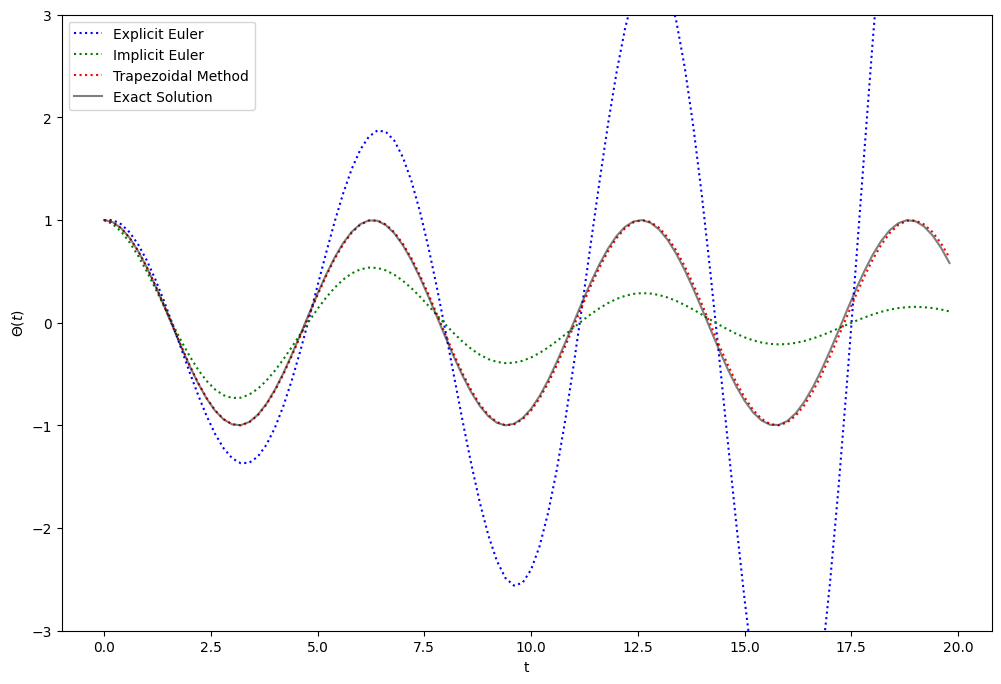

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('default')

h = 0.2
t = np.arange(0, 20, h)
w = 1
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b:')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r:')
plt.plot(t, np.cos(w*t), 'k-', alpha=0.5)
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit Euler', 'Implicit Euler', 'Trapezoidal Method', 'Exact Solution'])
plt.show()

From the graphing of these methods, we see that, for this problem, the Explicit Euler solution is unstable, continually increasing over time. On the other hand, the Implicit Euler solution is not accurate, decreasing over time. Finally, the Trapezoidal Method is both accurate and stable, although it appears to be slightly offset from the exact solution as time goes on. Depending on the situation in which we are solving this problem, none of the solution methods may be preferable for us.

To address these accuracy and stability issues, let's consider some more involved solution methods.

# *22.5 Predictor-Corrector and Runge Kutta Methods*

One of the more accurate methods that we can consider are predictor-corrector methods. These methods work exactly as the name implies: the first step (predictor) is an explicit method, and the second step (corrector) adjusts the solution so as to improve accuracy, and hopefully avoid instability. One simple example of a predictor-corrector method is the midpoint method. For this method, our predictor step is:

In [ ]:
# S(t_i + (h/2)) = S(t_i) + (h/2) * F[t_i, S(t_i)]

And then the corrector step is:

In [ ]:
# S(t_{i+1}) = S(t_i) + h * F[t_i + (h/2), S(t_i + (h/2))]

Another more accurate method to consider are Runge Kutta Methods, or RK methods. While the Euler method relied on the first two terms of the Taylor series expansion, RK methods rely on high order expansions. In general, we classify RK methods by their order of accuracy. For example, the second order RK method is second-order accurate, and is given by the following:

In [ ]:
# k_1 = F[t_i, S(t_i)]
# k_2 = F[t_i + h, S(t_i) + (h * k_1)]
# S(t_{i+1}) = S(t_i) + (h/2) * (k_1 + k_2)

On the other hand, the fourth order RK method is fourth-order accurate, given by the following:

In [ ]:
# k_1 = F[t_i, S(t_i)]
# k_2 = F[t_i + (h/2), S(t_i) + ((h/2) * k_1)]
# k_3 = F[t_i + (h/2), S(t_i) + ((h/2) * k_2)]
# k_4 = F[t_i + h, S(t_i) + (h * k_3)]
# S(t_{i+1}) = S(t_i) + (h/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)

Next, let's take a look at some built-in functions for solving the problem statement in Python.

# *22.6 Python ODE Solvers*

In the SciPy library, we have access to multiple ODE solvers for the initial value problem statement. The primary function from here that we will consider is integrate.solve_ivp.

scipy.integrate.solve_ivp solves initial value ODEs in the form of S'(t) = F[t, S(t)], S(t_0) = S_0, using a set method that we define for the function. For example, let's consider a simple ODE: S'(t) = cos(t), S(0) = 0, over the interval [0, 2pi] (which has explicit solution sin(t)):

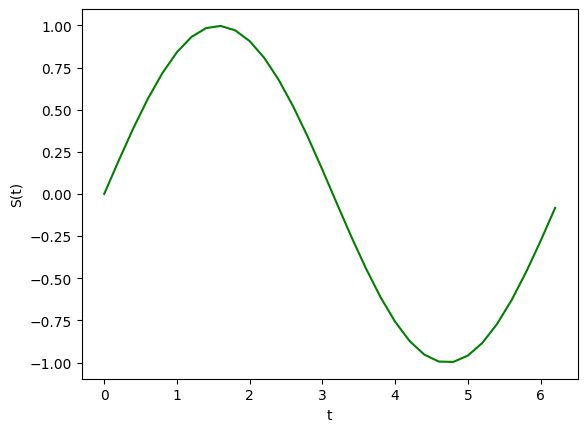

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('default')

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, 2*np.pi, 0.2)
sol = solve_ivp(F, [0, 2*np.pi], [0], method = 'RK45', t_eval=t_eval)

#plt.subplot(121)
plt.plot(sol.t, sol.y[0],'g-')
plt.xlabel('t')
plt.ylabel('S(t)')
#plt.subplot(122)
#plt.plot(sol.t, sol.y[0] - np.cos(sol.t))
#plt.xlabel('t')
#plt.ylabel('S(t) - sin(t)')
#plt.tight_layout()
plt.show()

We see that this solution is looking pretty good, but to confirm, let's take a look at the difference between this and the explicit solution:

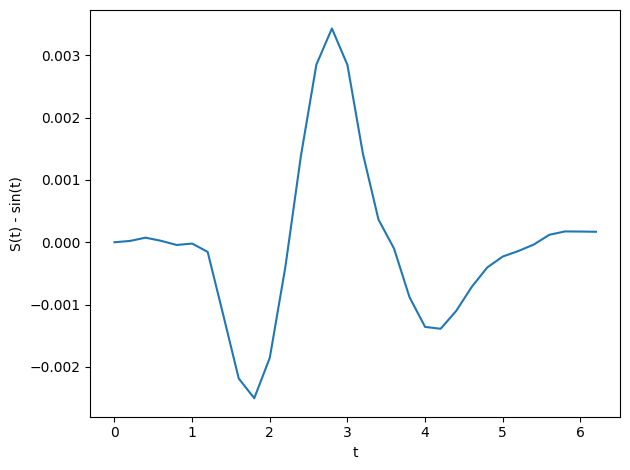

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('default')

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, 2*np.pi, 0.2)
sol = solve_ivp(F, [0, 2*np.pi], [0], method = 'RK45', t_eval=t_eval)

plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Which is accurate, as well as showing no signs of being unstable.